JPEG (600, 600) RGB


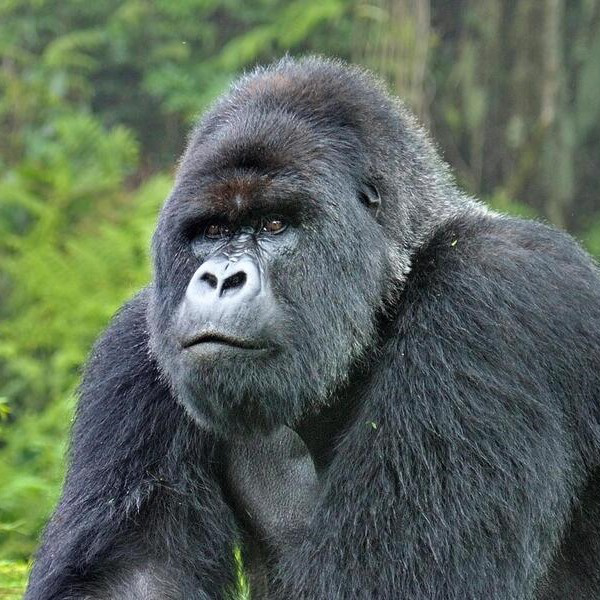

Small gorilla


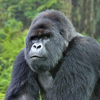

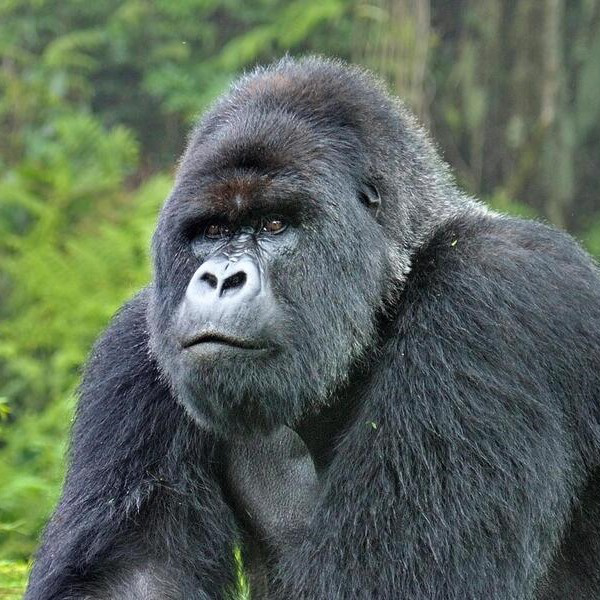

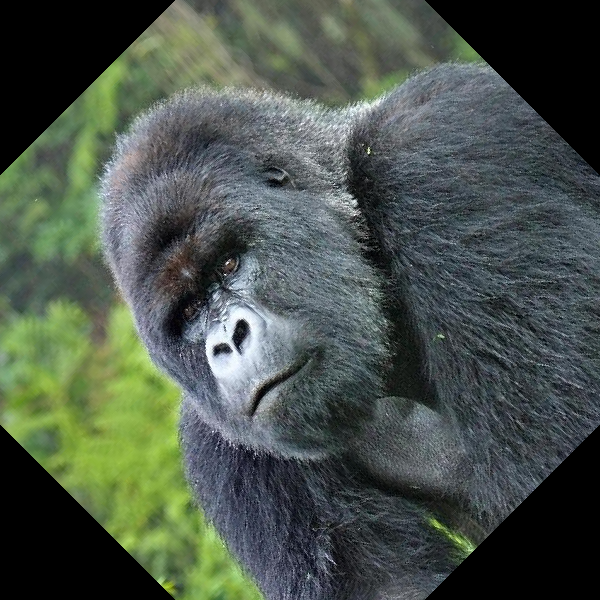

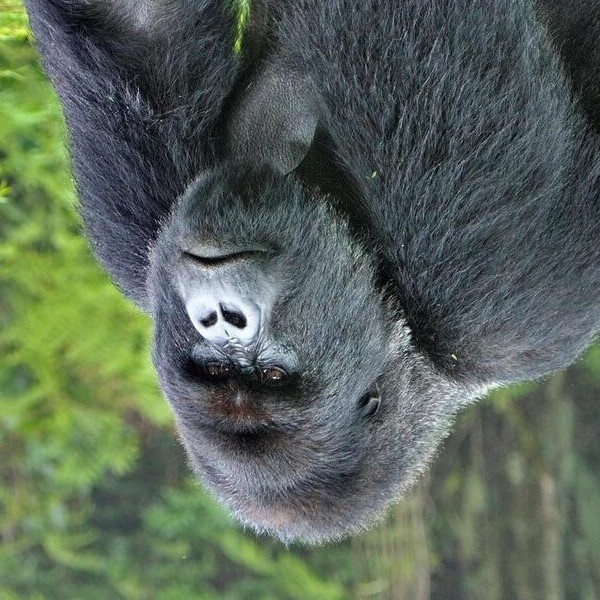

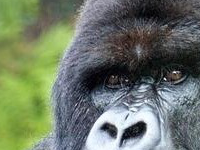

In [1]:
#2 zad
from PIL import Image as img
from PIL import ImageOps
import os, sys

gorilla = img.open("gorilla.jpg") #load
print(gorilla.format, gorilla.size, gorilla.mode)
gorilla.show()

reshapedSmallGorilla = gorilla.resize((100, 100)) #scale
print("Small gorilla")
reshapedSmallGorilla.show()

def roll(im, delta):
    """Roll an image sideways."""
    xsize, ysize = im.size

    delta = delta % xsize
    if delta == 0:
        return im

    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize - delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize - delta, ysize))

    return im


rolledGorilla = roll(gorilla, 600) #roll
rolledGorilla.show()

rotatedGorilla = gorilla.rotate(45) #rotate
rotatedGorilla.show()

transposedGorilla = gorilla.transpose(img.Transpose.FLIP_TOP_BOTTOM) #transpose
transposedGorilla.show()


box = (100, 150, 300, 300)
croppedGorilla = gorilla.crop(box) #crop
croppedGorilla.show()

#relative resizing + save to file

size = (100, 150)
with img.open("gorilla.jpg") as im:
    ImageOps.contain(im, size).save("imageops_contain.jpg")
    #ImageOps.cover(im, size).save("imageops_cover.jpg")
    ImageOps.fit(im, size).save("imageops_fit.jpg")
    ImageOps.pad(im, size, color="#f00").save("imageops_pad.jpg")

    # thumbnail() can also be used,
    # but will modify the image object in place
    im.thumbnail(size)
    im.save("imageops_thumbnail.jpg")